In [ ]:
import pandas as pd

Feature Scaling
|
|--> Standardization
|
|--> Normalization

Standardization sometimes also called z-score normalization

x_i = (x_i - x_mean)/SD

The mean of new series will be 0 and standar deviation will be 1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to training data, it will learn the parameters
scaler.fit(X_train)

# transform and fit the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

The outlier will remain outlier also after standardization. Those outliers need to be handled separately.

k-means, KNN, PCA, Artificial neural network, Gradient descent --> Standardization should be used for these algorithms

Normalization
|
|--> Min Max Scaling
|
|--> Mean Normalization
|
|--> Max absolute scaling
|
|--> Robust scaling

90% of cases Min Max scaling will be used

Min Max scaling --> weights --> 25, 65, 72, 87, .... , 85

x_i = (x_i - x_min)/(x_max - x_min)

Mean Normalization

x_i = (x_i - x_mean)/(x_max - x_min)

Max absolute scaling

x_i = x_i/|x_max|

Robust scaling

x_i = (x_i - x_median)/(IQR)

Robust to outliers

Feature Engineering
|
|-->Feature transformation
    |
    |-->Feature standardization (min max scaler, normalization)
    |
    |-->Feature encoding ({ordinal encoding, label encoding} --> ordinal data, {one hot encoding} --> Nominal data)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [ ]:
oe = OrdinalEncoder(categories=[["Poor", "Average", "Good"], ["School", "UG", "PG"]])
oe.fit(X_train)

In [ ]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

Label encoding is used for target variable. Not for input variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y_train)

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

One hot encoding using pandas

In [ ]:
pd.get_dummies(df, columns=["fuel", "owner"], drop_first=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:4]), df.iloc[:,-1], test_size=0.2, random_state=5)

In [ ]:
ohe = OneHotEncoder(drop='first')

drop='first' is used to remove first column to avoid multicollinearity

In [ ]:
ohe.fit(X_train["fuel", "owner"])
X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

In [ ]:
Column transformer

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', Simpleimputer(), ['fever']),
    ('tnf2', OrdinalEncoder(categories=[["Mild", "Strong"]]), ['Cough']),
    ('tnf3', OneHotEncoder(sparse=False, drop='first'), ['Gender', 'City'])
], remainder='passthrough')

In [ ]:
remainder=drop will be used for dropping the remaining columns

In [ ]:
transformer.fit(X_train)

In [ ]:
titanic data without pipeline

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:, :1], test_size=0.2, random_state=5)

In [10]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         147
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
# Applying Imputation

si_age = SimpleImputer()
si_emb = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_emb.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_emb.transform(X_test[['Embarked']])

In [13]:
# One hot encoding of sex and Embarked

ohe_sex = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked_ohe = ohe_embarked.fit_transform(X_train[['Embarked']])

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked_ohe = ohe_embarked.transform(X_test[['Embarked']])

In [14]:
X_train_rem = X_train.drop(columns=['Age', 'Sex', 'Embarked'])
X_test_rem = X_test.drop(columns=['Age', 'Sex', 'Embarked'])

In [16]:
X_train_transformed = np.concatenate((X_train_rem, X_train_age, X_train_sex, X_train_embarked_ohe), axis=1)
X_test_transformed = np.concatenate((X_test_rem, X_test_age, X_test_sex, X_test_embarked_ohe), axis=1)

In [19]:
clf = DecisionTreeClassifier()
clf.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = clf.predict(X_test_transformed)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7932960893854749

In [22]:
import pickle

In [29]:
pickle.dump(ohe_sex, open('models/ohe_sex.pkl', 'wb'))
pickle.dump(ohe_embarked, open('models/ohe_embarked.pkl', 'wb'))
pickle.dump(clf, open('models/clf.pkl', 'wb'))

In [25]:
# using pickle files for making prediction

import pickle
import numpy as np

In [30]:
ohe_sex = pickle.load(open('models/ohe_sex.pkl', 'rb'))
ohe_embarked = pickle.load(open('models/ohe_embarked.pkl', 'rb'))
clf = pickle.load(open('models/clf.pkl', 'rb'))

In [31]:
# user input

test_input = np.array([2, 'male', 31, 0, 0, 10.5, 'S'], dtype=object).reshape(1,7)

In [35]:
test_input

array([[2, 'male', 31, 0, 0, 10.5, 'S']], dtype=object)

In [37]:
test_input_sex = ohe_sex.transform(test_input[:, 1].reshape(1,1))

In [38]:
test_input_embarked = ohe_embarked.transform(test_input[:,-1].reshape(1,1))

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [41]:
test_input_age = test_input[:, 2].reshape(1,1)

In [42]:
test_input_transformed = np.concatenate((test_input[:, [0,3,4,5]], test_input_age, test_input_sex, test_input_embarked), axis=1)

In [43]:
clf.predict(test_input_transformed)

array([0], dtype=int64)

In [ ]:
titanic with pipeline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:, :1], test_size=0.2, random_state=5)

In [8]:
# impute transformer

trf1 = ColumnTransformer([
    ("impute_age", SimpleImputer(), [2]),
    ("impute_embarked", SimpleImputer(strategy='most_frequent'), [6])
], remainder='passthrough')

In [9]:
# Onehot encoding
trf2 = ColumnTransformer([
    ("Sex_ohe", OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [1]),
    ("Embarked_ohe", OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [6])
], remainder='passthrough')

In [10]:
# scaling
trf3 = ColumnTransformer([
    ("scalar", MinMaxScaler(), slice(0, 8))
])

In [11]:
# Feature selection
trf4 = SelectKBest(score_func=chi2, k=5)

In [12]:
# train the model

trf5 = DecisionTreeClassifier()

In [ ]:
Create Pipeline

In [13]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3),
    ('trf4', trf4),
    ('trf5', trf5)
])

In [ ]:
Pipeline vs make_pipeline

make_pipeline doesn't require tranformer name

pipe = make_pipeline(trf1, trf2, trf3, trf4, trf5)

In [14]:
# Display pipeline

from sklearn import set_config
set_config(display='diagram')

In [15]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Sex_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1]),
                                                 ('Embarked_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scalar', MinMaxScaler(),
                                                  slice(0, 8, None))])),
                ('trf4',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x0000020C5AE27DC0>)),
                ('trf5', DecisionTreeClassifier())])

In [ ]:
Exploring pipelines and checking different transformers

In [16]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('Sex_ohe',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  [1]),
                                 ('Embarked_ohe',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  [6])]),
 'trf3': ColumnTransformer(transformers=[('scalar', MinMaxScaler(), slice(0, 8, No

In [17]:
pipe.named_steps['trf1'].transformers_

[('impute_age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder', 'passthrough', [0, 1, 3, 4, 5])]

In [20]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([30.06357522])

In [21]:
# Prediction

y_pred = pipe.predict(X_test)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [22]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5977653631284916

In [ ]:
Cross validation using pipeline

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning:

0.6193538855510686

In [ ]:
GridSearch using pipeline

In [25]:
# gridsearchcv

params = {
    'trf5__max_depth': [1,2,3,4,5,None]
}

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Sex_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1]),
                                                                        ('Embarked_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scalar',
                                                                         MinMaxScaler(),
                                                                         slice(0, 8, None))])),
                                       ('trf4',
                                        SelectKBest(k=5,
                                                    score_func=<function chi2 at 0x0000020C5AE27DC0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [27]:
grid.best_score_

0.6193538855510686

In [28]:
grid.best_params_

{'trf5__max_depth': 4}

In [ ]:
Exporting the pipeline

In [30]:
# Exporting

import pickle
pickle.dump(pipe, open('models/titanic_pipe.pkl', 'wb'))

In [ ]:
Production code with pipeline

In [31]:
prod_pipe = pickle.load(open('models/titanic_pipe.pkl', 'rb'))

In [33]:
import numpy as np

In [35]:
test_input2 = np.array([2, 'male', 31, 0, 0, 10.5, 'S'], dtype=object).reshape(1,7)

In [36]:
pipe.predict(test_input2)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Mathematical tansformations
|
|--> log transformation
|
|--> Reciprocal transformation
|
|--> Power transformation
|
|--> Box Cox transformation
|
|--> Yeo Johnson

Some machine learning algorithms like Linear Regression, Logistic regression etc. works better with normal distribution. Mathematical transformation help converting data into normal distribution thereby increasing accuracy.

Function transformer
|
|--> log transformation
|
|--> Reciprocal transformation
|
|--> Power transformation

Power transformer
|
|--> Box Cox transformation
|
|--> Yeo Johnson


QQ plot can be used to find out if the data is normal

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,:1], test_size=0.2, random_state=5)

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


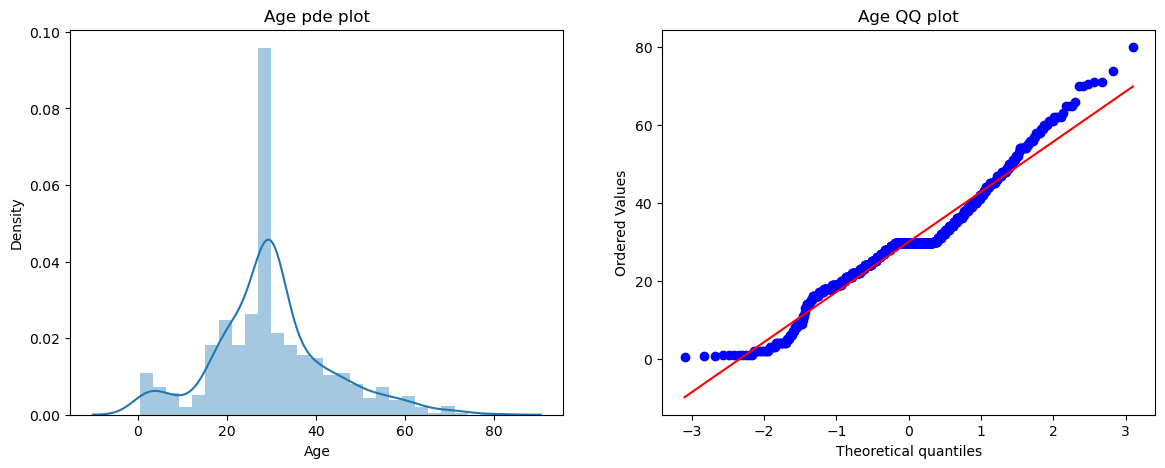

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pde plot')

plt.subplot(122)
probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


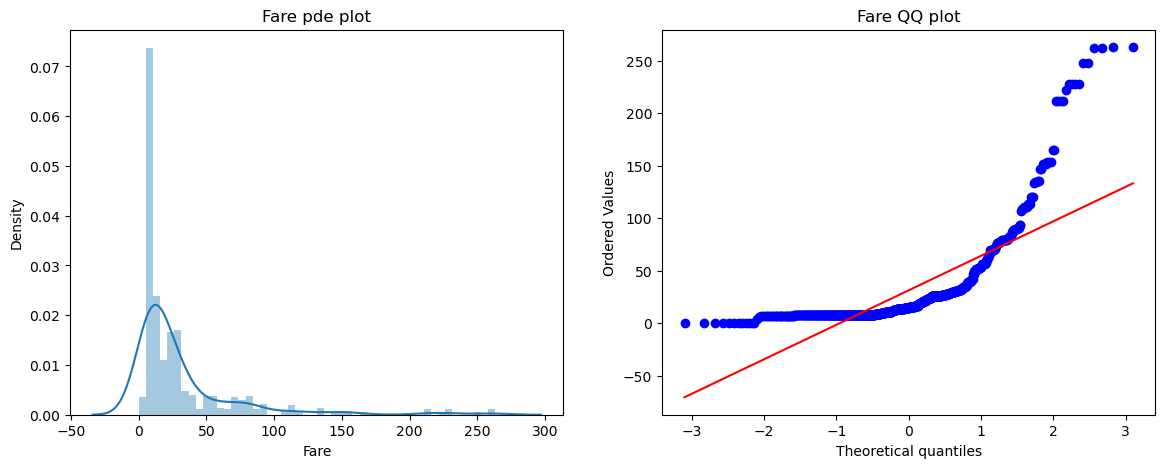

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pde plot')

plt.subplot(122)
probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred_logistic = clf.predict(X_test)
y_pred_decision = clf2.predict(X_test)

print("Accuracy logistic: ", accuracy_score(y_pred_logistic, y_test))
print("Accuracy decision: ", accuracy_score(y_pred_decision, y_test))

Accuracy logistic:  0.6480446927374302
Accuracy decision:  0.6983240223463687


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
trf = FunctionTransformer(func=np.log1p)

In [18]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [19]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred_logistic = clf.predict(X_test_transformed)
y_pred_decision = clf2.predict(X_test_transformed)

print("Accuracy logistic: ", accuracy_score(y_pred_logistic, y_test))
print("Accuracy decision: ", accuracy_score(y_pred_decision, y_test))

Accuracy logistic:  0.6983240223463687
Accuracy decision:  0.6871508379888268


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
X_transformed = trf.fit_transform(df.iloc[:,1:])

print("accuracy Logistic: ", np.mean(cross_val_score(clf, X_transformed, df.iloc[:,:1], cv=10, scoring='accuracy')))
print("accuracy Decision: ", np.mean(cross_val_score(clf2, X_transformed, df.iloc[:,:1], cv=10, scoring='accuracy')))

accuracy Logistic:  0.678027465667915
accuracy Decision:  0.6621847690387017


c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Power Transformer
|
|--> Box Cox Transform
|
|--> Yeo Johnson Transform

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import probplot
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

In [23]:
df = pd.read_csv('train.csv')

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
df.drop(columns=['Cabin'], inplace=True)

In [26]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
df = df[['Age', 'Fare', 'Survived']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2], df.iloc[:,2:], test_size=0.2, random_state=5)

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


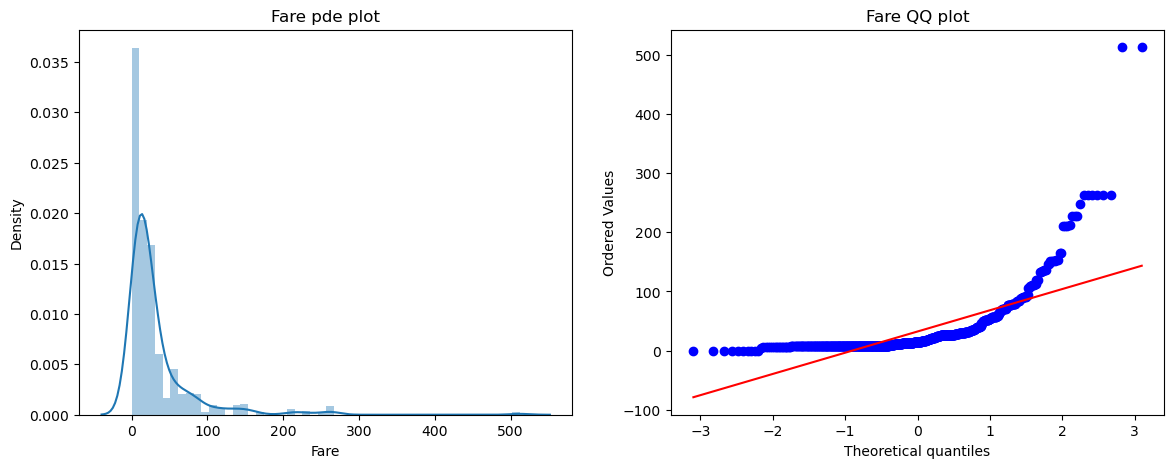

In [31]:
plt.figure(figsize=(14,5))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pde plot')

plt.subplot(122)
probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [33]:
# Applying Box Cox tranformation

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.fit_transform(X_test + 0.000001)


Box Cox can only be applied to values greater than 0. Yeo Johnson tranformation can be applied to zero or negative values
default method of power transformer is Yeo Johnson

In [34]:
# Applying Yeo Johnson tranformation

pt = PowerTransformer()

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [17]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.dropna(inplace=True)

In [18]:
X = df.iloc[:, 1:]
y = df.iloc[:, :1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
clf = DecisionTreeClassifier()

In [21]:
X_train.head()

,Age,Fare
441,20.0,9.5000
645,48.0,76.7292
553,22.0,7.2250
688,18.0,7.7958
456,65.0,26.5500


In [22]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [23]:
accuracy_score(y_pred, y_test)

0.5874125874125874

In [25]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6233176838810641

In [26]:
k_bin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
k_bin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [31]:
trf = ColumnTransformer([
    ('trf1', k_bin_age, [0]),
    ('trf2', k_bin_fare, [1])
])

In [32]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [33]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_trf, y_train)
y_pred = clf2.predict(X_test_trf)

In [34]:
accuracy_score(y_pred, y_test)

0.6713286713286714